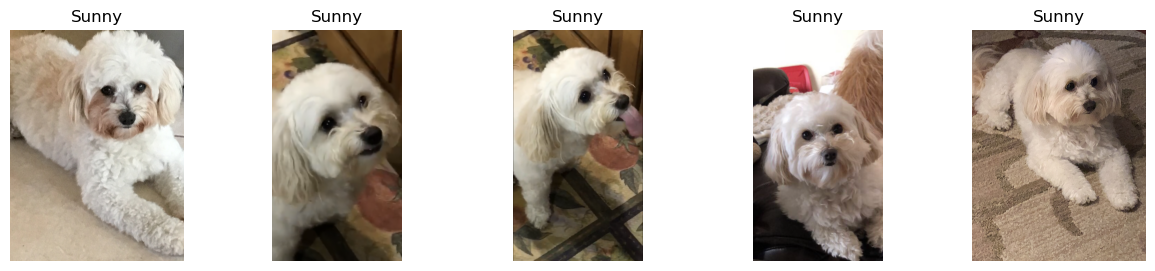

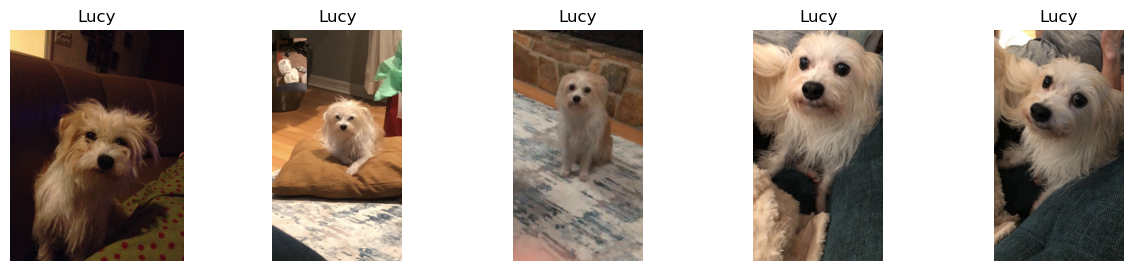

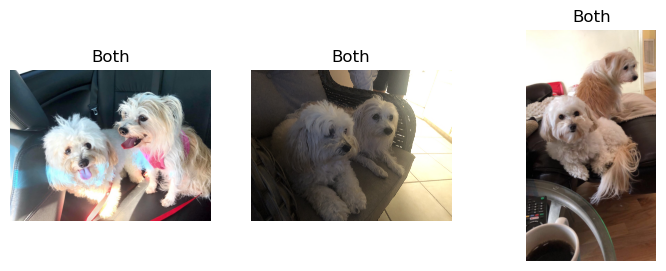

100%|██████████| 3/3 [00:00<00:00, 10.57it/s]


In [1]:
# This is my first deep learning model ever. I made this to classify images of my dogs based on pictures I have the two
# muts for years. This will be image classification with the variables being 'Sunny','Lucy' or 'Both' 
#I am going to first show the libraries I used and then I will load the images from my directory just to see how cute they are.


import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt



class_names = ['Sunny','Lucy','both']
class_names_labels = {class_name: i for i, class_name in enumerate(class_names)}

image_size = (150,150)


def display_images(folder_path,label):
    plt.figure(figsize=(15,3))
    for i, filename in enumerate(os.listdir(folder_path)[:5]):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.title(f'{label}')
        plt.axis('off')
    plt.show()

# Pictures of the dogs
display_images('C:/ml/python/data/lucy_sunny/Sunny','Sunny')
display_images('C:/ml/python/data/lucy_sunny/Lucy','Lucy')
display_images('C:/ml/python/data/lucy_sunny/Sunny_and_Lucy','Both')


def load_images(folder_path,label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size)
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images for each class
sunny_images, sunny_labels = load_images('C:/ml/python/data/lucy_sunny/Sunny',class_names_labels['Sunny'])
lucy_images, lucy_labels = load_images('C:/ml/python/data/lucy_sunny/Lucy',class_names_labels['Lucy'])
both_images, both_labels = load_images('C:/ml/python/data/lucy_sunny/Sunny_and_Lucy',class_names_labels['both'])

In [2]:
#Now I will tie the images of 'sunny','lucy',and 'both' to X and y to train the images then keras will run a CNN through to test the accuracy of the image
# the image classifier. The model will be compiled and tested through a train/test split of 20% for testing 'loss' and 'accuracy'
# The results will then be displayed and then the model will be compiled for accuracy of the image classifier

X = np.concatenate([sunny_images,lucy_images,both_images],axis=0)
y = np.concatenate([sunny_labels,lucy_labels,both_labels],axis=0)

# train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


X_train = X_train/255.0
X_test = X_test/255.0

# CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,epochs=20,validation_split=0.20)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 1.0703 - accuracy: 0.6000 - val_loss: 5.2079 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 468ms/step - loss: 5.6462 - accuracy: 0.6000 - val_loss: 1.2687 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 473ms/step - loss: 0.9408 - accuracy: 0.6000 - val_loss: 1.4626 - val_accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 0s 486ms/step - loss: 1.4065 - accuracy: 0.4000 - val_loss: 1.2531 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 469ms/step - loss: 1.0382 - accuracy: 0.4000 - val_loss: 1.2588 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 0s 479ms/step - loss: 0.7887 - accuracy: 0.7000 - val_loss: 1.1181 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 490ms/step - loss: 0.7710 - accuracy: 0.6000 - val_loss: 0.8596 - val_accuracy: 0.6667
Epoch 8/20
1/1 [===

1/1 [==============================] - 0s 73ms/step - loss: 1.4761 - accuracy: 0.7500
Test Accuracy: 0.75
test loss: 1.4760544300079346


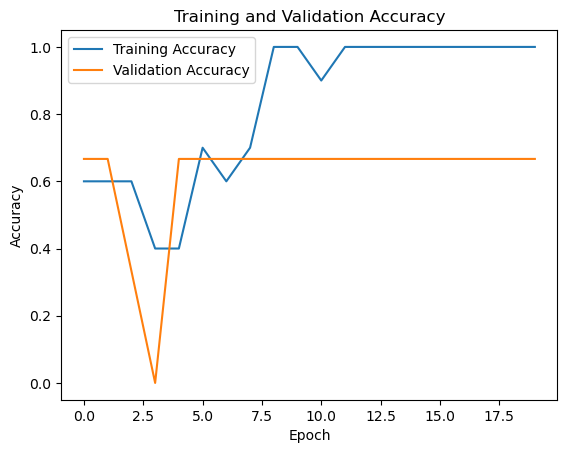

1/1 [==============================] - 0s 213ms/step
              precision    recall  f1-score   support

       Sunny       1.00      1.00      1.00         3
        Lucy       0.00      0.00      0.00         0
        both       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.75      0.75      0.75         4



In [3]:
#this will display the image that was classifier correctly the most (True Positive rate) and the training accuracy and 
# the validation set through hisotry. 

# loss/accuracy
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f'Test Accuracy: {test_acc}')
print(f'test loss: {test_loss}')


# training history
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# predictions on the test set
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=1)

# classification report# classification report
print(classification_report(y_test,y_pred,target_names=class_names))
rand_indices = np.random.choice(len(X_test),size=min(15,len(X_test)),replace=False)

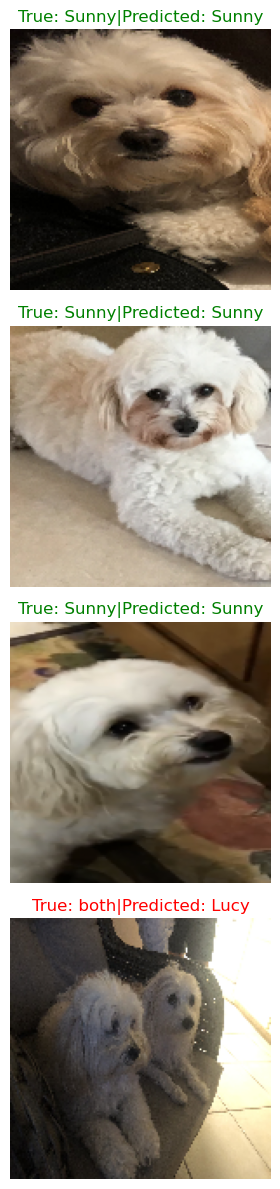

In [4]:

#This will show the features that was picked the most and the features that were supposed to be chosen, but were not.
# The True Positive Rate and False Positive rate, but with little angel dogs

plt.figure(figsize=(15,3*len(rand_indices)))

for i, index in enumerate(rand_indices):
    plt.subplot(len(rand_indices),1,i+1)
    plt.imshow(X_test[index])
    predicted_class = class_names[int(y_pred[index])]
    true_class = class_names[int(y_test[index])]
    color = 'green' if predicted_class == true_class else 'red'
    plt.title(f'True: {true_class}|Predicted: {predicted_class}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
